# Clustering

## Data Prep

In [1]:
import pandas as pd

df = pd.read_csv('Data/entertainment_clean.csv')
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [2]:
# Checks
# 1. Right row granularity
# 2. Columns are non-null
# 3. Columns are numeric
# 4. Feature engineering
# 5. Feature selection
# 6. Feature scaling

In [3]:
df.shape

(150, 4)

In [4]:
df.name.nunique()

150

In [5]:
df[df.isna().any(axis=1)]

,name,books,tv_shows,video_games


In [6]:
df.dtypes

name            object
books          float64
tv_shows       float64
video_games    float64
dtype: object

In [7]:
data = df.drop(columns=['name'])
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [8]:
data.describe()

,books,tv_shows,video_games
count,150.000000,150.000000,150.000000
mean,2.993333,4.586000,5.843333
std,1.917761,0.645587,0.828066
min,0.000000,3.000000,4.300000
25%,0.800000,4.200000,5.100000
50%,3.200000,4.500000,5.800000
75%,4.500000,4.900000,6.400000
max,6.200000,6.600000,7.900000


## 1. K-Means Clustering

In [9]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


#The code above fixes the following warning:

#C:\Users\Camilo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
#  warnings.warn(

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)

In [12]:
kmeans2.fit(data) # Initializes clustering logic

KMeans(n_clusters=2, random_state=42)

In [13]:
kmeans2.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

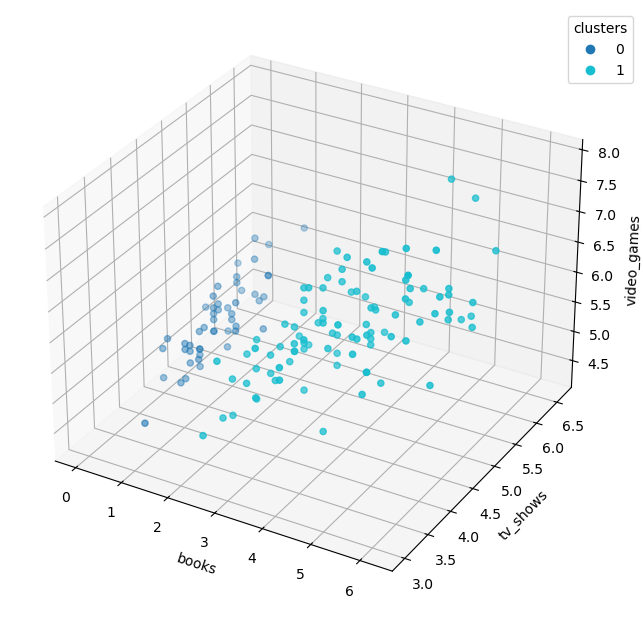

In [14]:
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# combine the data and cluster labels
cluster_labels = pd.Series(kmeans2.labels_, name='cluster')

# create a clean dataframe
df_clean = pd.concat([data, cluster_labels], axis=1)

# create a 3d scatter plot
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

# specify the data and labels
sc = ax.scatter(df_clean['books'], df_clean['tv_shows'], df_clean['video_games'],
                c=df_clean['cluster'], cmap='tab10')
ax.set_xlabel('books')
ax.set_ylabel('tv_shows')
ax.set_zlabel('video_games')

# add a legend
plt.legend(*sc.legend_elements(), title='clusters',
           bbox_to_anchor=(1.05, 1));

In [15]:
# Start interpretation
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [16]:
data.columns

Index(['books', 'tv_shows', 'video_games'], dtype='object')

In [17]:
kmeans2.cluster_centers_

array([[0.596, 5.13 , 5.006],
       [4.192, 4.314, 6.262]])

In [18]:
data.mean()

books          2.993333
tv_shows       4.586000
video_games    5.843333
dtype: float64

In [19]:
# Cluster 0: [0.596, 5.13 , 5.006]  ~ non-readers
# Cluster 1: [4.192, 4.314, 6.262]  ~ entertainment enthusiasts

In [20]:
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)

In [21]:
kmeans3.fit(data)

KMeans(n_clusters=3, random_state=42)

In [22]:
kmeans3.labels_

array([0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0,
       1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1,
       0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0])

In [23]:
kmeans3.cluster_centers_

array([[0.596     , 5.13      , 5.006     ],
       [5.14375   , 4.52708333, 6.63958333],
       [3.31346154, 4.11730769, 5.91346154]])

In [24]:
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data.columns)
cluster_centers3

,books,tv_shows,video_games
0,0.596000,5.130000,5.006000
1,5.143750,4.527083,6.639583
2,3.313462,4.117308,5.913462


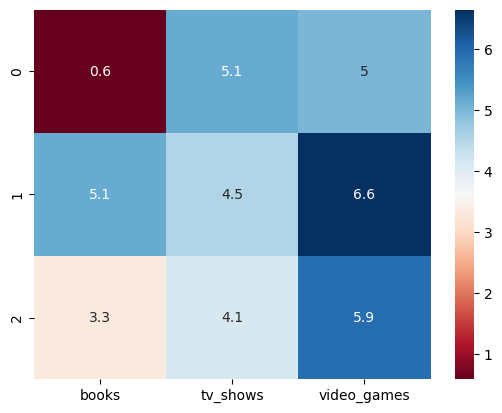

In [25]:
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

In [26]:
# Cluster 0: non-readers
# Cluster 1: entertainment enthusiasts
# Cluster 2: prefer video games over books

## Inertia Plot

In [27]:
kmeans2.inertia_

206.44200000000004

In [28]:
kmeans3.inertia_

105.47568525641027

In [29]:
# Goal: Fit kmeans 2-15 clusters

In [30]:
kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans2.fit(data)
kmeans2.inertia_

206.44200000000004

In [31]:
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data)
kmeans3.inertia_

105.47568525641027

In [32]:
inertia_values = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data)
    #print(kmeans.inertia_)
    inertia_values.append(kmeans.inertia_)

In [33]:
inertia_values

[206.44200000000004,
 105.47568525641027,
 93.51530906593402,
 70.15778305028302,
 60.404557575757586,
 55.951117989001645,
 55.52002215876229,
 45.48421550671551,
 42.53241376678876,
 37.06426802364302,
 35.84139714452214,
 35.114057400932396,
 32.7026974251239,
 30.524871794871782]

In [34]:
import matplotlib.pyplot as plt

In [35]:
inertia_series = pd.Series(inertia_values, index=range(2,16))

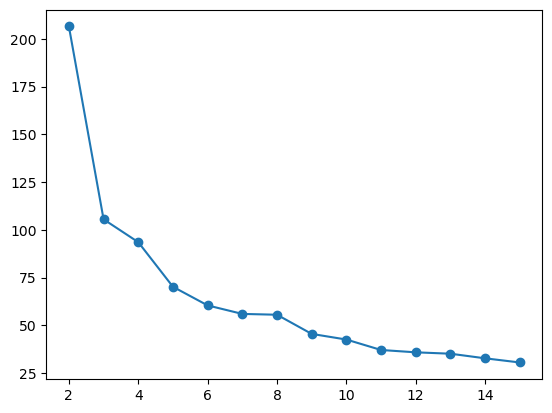

In [36]:
inertia_series.plot(marker='o');

In [37]:
# Elbows at K = 3, 5

In [38]:
kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=42)

In [39]:
kmeans5.fit(data)

KMeans(n_clusters=5, random_state=42)

In [40]:
kmeans5.labels_

array([3, 3, 3, 1, 2, 4, 1, 2, 3, 1, 1, 3, 3, 3, 3, 0, 1, 3, 4, 4, 1, 2,
       2, 4, 2, 1, 3, 0, 0, 4, 2, 1, 4, 1, 4, 2, 1, 3, 0, 4, 2, 2, 3, 0,
       1, 2, 3, 1, 3, 4, 4, 1, 1, 2, 1, 4, 0, 1, 2, 2, 3, 0, 3, 2, 4, 1,
       0, 2, 1, 1, 1, 4, 2, 4, 2, 1, 2, 1, 2, 1, 1, 4, 3, 3, 3, 1, 1, 3,
       0, 2, 3, 2, 1, 2, 2, 1, 2, 1, 2, 3, 1, 3, 2, 2, 4, 1, 3, 4, 3, 0,
       4, 4, 3, 3, 3, 4, 1, 3, 4, 2, 1, 4, 3, 0, 3, 4, 2, 1, 1, 0, 3, 3,
       4, 0, 2, 4, 1, 1, 1, 2, 3, 3, 2, 1, 2, 4, 4, 4, 0, 3])

In [41]:
kmeans5.cluster_centers_

array([[0.68571429, 5.81428571, 5.37857143],
       [4.14871795, 4.39230769, 6.33589744],
       [3.08787879, 3.90909091, 5.65757576],
       [0.56111111, 4.86388889, 4.86111111],
       [5.55357143, 4.68214286, 6.87142857]])

In [42]:
cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns=data.columns)
cluster_centers5

,books,tv_shows,video_games
0,0.685714,5.814286,5.378571
1,4.148718,4.392308,6.335897
2,3.087879,3.909091,5.657576
3,0.561111,4.863889,4.861111
4,5.553571,4.682143,6.871429


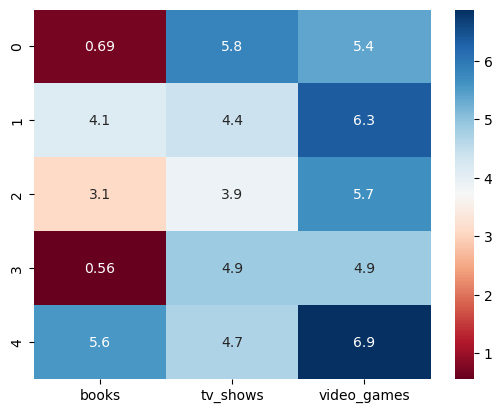

In [43]:
sns.heatmap(cluster_centers5, cmap='RdBu', annot=True);

In [44]:
#------------ new ---------------------
# Cluster 0 and 3: non-reader
# Cluster 1 and 2: Prefer videogames to books
# Cluster 4: entertainment enthusiastsb

#------------ old ---------------------
# Cluster 0: non-readers
# Cluster 1: entertainment enthusiasts
# Cluster 2: prefer video games over books

## Tune the K-Means Model

In [45]:
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [46]:
data_v2 = pd.read_pickle('Data/entertainment_data_for_modeling.pkl')
data_v2.head()

entertainment,video_game_lover,total_entertainment,pct_screen
0,-0.294884,-1.360056,1.384262
1,-0.294884,-1.551591,1.918235
2,-0.294884,-1.336114,1.388865
3,-0.294884,0.435582,-0.344126
4,-0.294884,-0.258731,-0.217658


In [47]:
inertia_values_v2 = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data_v2)
    inertia_values_v2.append(kmeans.inertia_)

In [48]:
inertia_values_v2

[204.3306995303364,
 48.768491002597074,
 23.081405817631225,
 19.96974534696725,
 14.54420439908639,
 13.149474009661285,
 10.776480219489613,
 8.899026602409878,
 7.970325819719771,
 7.475023819085278,
 6.245887490162979,
 5.957877038771971,
 5.5330102147941265,
 5.120263895769977]

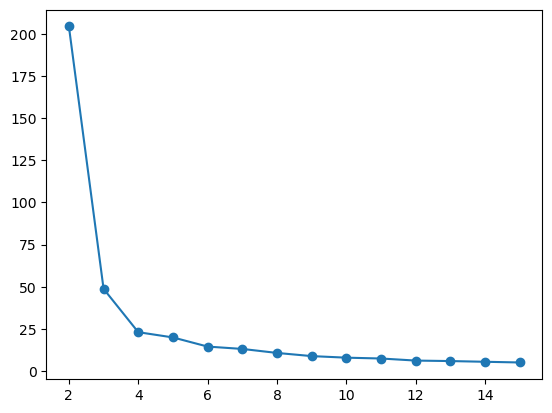

In [49]:
inertia_series_v2 = pd.Series(inertia_values_v2, index=range(2,16))
inertia_series_v2.plot(marker='o');

In [50]:
kmeans4 = KMeans(n_clusters=4, n_init='auto', random_state=42)

In [51]:
kmeans4.fit(data_v2)

KMeans(n_clusters=4, random_state=42)

In [52]:
kmeans4.labels_

array([0, 0, 0, 3, 3, 1, 1, 3, 0, 3, 1, 0, 0, 0, 0, 0, 3, 0, 1, 2, 3, 3,
       3, 1, 3, 1, 0, 0, 0, 2, 3, 2, 1, 1, 1, 3, 3, 0, 0, 1, 3, 3, 0, 0,
       1, 3, 0, 1, 0, 2, 2, 1, 3, 3, 3, 1, 0, 1, 3, 3, 0, 0, 0, 3, 1, 2,
       0, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 0, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 3, 3, 3, 2, 3, 1, 3, 0, 1, 0, 3, 3, 2, 3, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 1, 3, 0, 1, 3, 3, 2, 0, 0, 0, 2, 3, 3, 3, 0, 0, 0,
       1, 0, 3, 1, 1, 1, 1, 3, 0, 0, 3, 1, 3, 1, 1, 2, 0, 0])

In [53]:
kmeans4.cluster_centers_

array([[-0.29488391, -1.19389982,  1.32786949],
       [-0.29488391,  0.98757435, -1.04388409],
       [ 3.39116499,  1.53491145, -0.74383666],
       [-0.29488391,  0.11006494, -0.38245398]])

In [54]:
cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns=data_v2.columns)
cluster_centers4

entertainment,video_game_lover,total_entertainment,pct_screen
0,-0.294884,-1.193900,1.327869
1,-0.294884,0.987574,-1.043884
2,3.391165,1.534911,-0.743837
3,-0.294884,0.110065,-0.382454


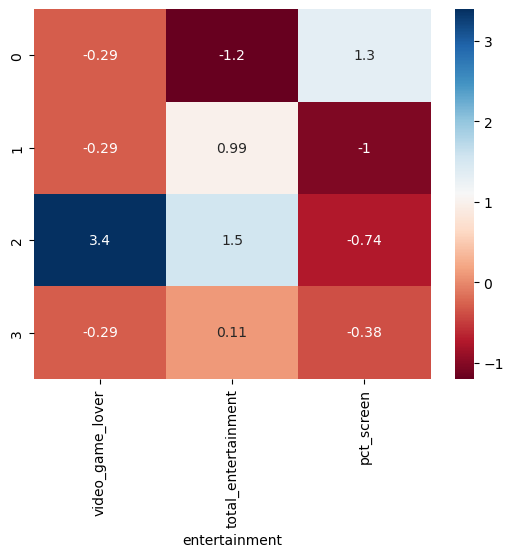

In [55]:
sns.heatmap(cluster_centers4, cmap='RdBu', annot=True);

In [56]:
# Cluster 0: -Entertainment, -Books.
# Cluster 1: +Books, -Screens.
# Cluster 2: +Entertainment, +video games.
# Cluster 3: Typical students.

## Selecting the Best K-Means Model

The three clusters created from the original data set (books, tv_shows, movies):
* Cluster 0: **Non-readers**
* Cluster 1: **Entertainment enthusiasts**
* Cluster 2: **Prefer video games to books**

The four clusters created from the updated data set (video_game_lover, total_entertainment, pct_screen):
* Cluster 0: **Less entertainment, especially books**
* Cluster 1: **Prefer books to screens**
* Cluster 2: **Entertainment enthusiasts, especially video games**
* Cluster 3: **Typical students**

In [57]:
kmeans3.labels_

array([0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0,
       1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1,
       0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0])

In [58]:
kmeans4.labels_

array([0, 0, 0, 3, 3, 1, 1, 3, 0, 3, 1, 0, 0, 0, 0, 0, 3, 0, 1, 2, 3, 3,
       3, 1, 3, 1, 0, 0, 0, 2, 3, 2, 1, 1, 1, 3, 3, 0, 0, 1, 3, 3, 0, 0,
       1, 3, 0, 1, 0, 2, 2, 1, 3, 3, 3, 1, 0, 1, 3, 3, 0, 0, 0, 3, 1, 2,
       0, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 0, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 3, 3, 3, 2, 3, 1, 3, 0, 1, 0, 3, 3, 2, 3, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 1, 3, 0, 1, 3, 3, 2, 0, 0, 0, 2, 3, 3, 3, 0, 0, 0,
       1, 0, 3, 1, 1, 1, 1, 3, 0, 0, 3, 1, 3, 1, 1, 2, 0, 0])

In [62]:
model1_clusters = pd.Series(kmeans3.labels_, name='model1_clusters')
model1_names = model1_clusters.map({
    0: 'Non-readers',
    1: 'Entertainment enthusiasts',
    2: 'Prefer video games to books'
})

model1_names.head()

0                    Non-readers
1                    Non-readers
2                    Non-readers
3    Prefer video games to books
4    Prefer video games to books
Name: model1_clusters, dtype: object

In [64]:
model2_clusters = pd.Series(kmeans4.labels_, name='model2_clusters')
model2_names = model2_clusters.map({
    0: 'Less entertainment, especially books',
    1: 'Prefer books to screens',
    2: 'Entertainment enthusiasts, especially video games',
    3: 'Typical students'
})

model2_names.head()

0    Less entertainment, especially books
1    Less entertainment, especially books
2    Less entertainment, especially books
3                        Typical students
4                        Typical students
Name: model2_clusters, dtype: object

In [65]:
model1_names.value_counts()

model1_clusters
Prefer video games to books    52
Non-readers                    50
Entertainment enthusiasts      48
Name: count, dtype: int64

In [66]:
model2_names.value_counts()

model2_clusters
Typical students                                     52
Less entertainment, especially books                 50
Prefer books to screens                              36
Entertainment enthusiasts, especially video games    12
Name: count, dtype: int64

In [67]:
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [69]:
cluster_names = pd.concat([df, model1_names, model2_names], axis=1)
cluster_names.head()

,name,books,tv_shows,video_games,model1_clusters,model2_clusters
0,Aaliyah,0.5,4.6,4.9,Non-readers,"Less entertainment, especially books"
1,Abigail,0.0,4.5,4.8,Non-readers,"Less entertainment, especially books"
2,Addison,0.5,4.5,5.0,Non-readers,"Less entertainment, especially books"
3,Adeline,3.5,4.5,6.6,Prefer video games to books,Typical students
4,Alana,2.8,3.8,5.6,Prefer video games to books,Typical students


In [73]:
(cluster_names.groupby(['model1_clusters', 'model2_clusters'])
 [['books', 'tv_shows', 'video_games']]
 .mean())

books  \
model1_clusters             model2_clusters                                               
Entertainment enthusiasts   Entertainment enthusiasts, especially video games  5.125000   
                            Prefer books to screens                            5.150000   
Non-readers                 Less entertainment, especially books               0.596000   
Prefer video games to books Typical students                                   3.313462   

                                                                               tv_shows  \
model1_clusters             model2_clusters                                               
Entertainment enthusiasts   Entertainment enthusiasts, especially video games  4.691667   
                            Prefer books to screens                            4.472222   
Non-readers                 Less entertainment, especially books               5.130000   
Prefer video games to books Typical students                                   4.117308   

                                                                               video_games  
model1_clusters             model2_clusters                                                 
Entertainment enthusiasts   Entertainment enthusiasts, especially video games     7.475000  
                            Prefer books to screens                               6.361111  
Non-readers                 Less entertainment, especially books                  5.006000  
Prefer video games to books Typical students                                      5.913462

In [ ]:
# Typical student
# Non-readers
# Entertainment enthusiasts